# Grid Search Preprocessing and Model Param

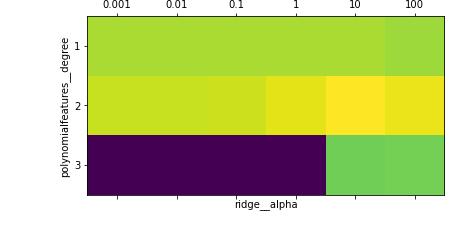

In [4]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# create param grid for our
# polynomial features and
# gridSearch
param_grid = {"polynomialfeatures__degree": [1, 2, 3],
              "ridge__alpha": [0.001, 0.01, 0.1, 1, 10, 100]}

pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge()
)

# put our pipe and param_grid
# to grid search
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    n_jobs=-1 #use all of the threads
)
grid.fit(X_train, y_train)

# plotting our model cross validation results
import matplotlib.pyplot as plt
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1), vmin=0, cmap='viridis')
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
            param_grid['polynomialfeatures__degree']) 
plt.colorbar()

In [7]:
# get our best params
print("Best params {}".format(grid.best_params_))
# check our score
print("Score {:.2f}".format(grid.score(X_test, y_test)))

Best params {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
Score 0.77


In [8]:
# test grid search without polynomial
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score without poly features: 0.63
